In [1]:
import pandas as pd
import numpy as np
import nltk
from pathlib import Path
import dtale
import pprint
from matplotlib import pyplot as plt
import matplotlib

In [2]:
df1 = pd.read_csv("./oesch16_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
#df = df[df.combi_model=="nn"]
#df = df[df.combi_model=="xgboost"]
#df = df[df.combi_model=="linear"]
df.head(10)

,Name,combi_model,confidence average @0.0.validation accuracy @0.0:,confidence average @0.5.percentage labelled @0.5:,confidence average @0.55.percentage labelled @0.55:,confidence average @0.6.percentage labelled @0.6:,confidence average @0.65.percentage labelled @0.65:,confidence average @0.7.percentage labelled @0.7:,confidence average @0.75.percentage labelled @0.75:,confidence average @0.8.percentage labelled @0.8:,...,confidence average @0.98.validation accuracy @0.98:,confidence average @0.99.validation accuracy @0.99:,confidence average @0.992.validation accuracy @0.992:,confidence average @0.994.validation accuracy @0.994:,confidence average @0.995.validation accuracy @0.995:,confidence average @0.996.validation accuracy @0.996:,confidence average @0.997.validation accuracy @0.997:,confidence average @0.998.validation accuracy @0.998:,confidence average @0.999.validation accuracy @0.999:,confidence average @0.0.percentage labelled @0.0:
0,"""second""",nn,0.779667,0.976000,0.956667,0.936333,0.916000,0.895000,0.871333,0.843667,...,0.914667,0.929667,0.933667,0.939333,0.942333,0.945333,0.948333,0.953333,0.960667,1.0
1,"""third""",nn,0.775333,0.974000,0.953000,0.932667,0.911667,0.888333,0.865667,0.838667,...,0.917333,0.931333,0.934667,0.939333,0.942333,0.946000,0.949667,0.955333,0.959000,1.0
2,"""best""",nn,0.777667,0.975333,0.955667,0.934667,0.913667,0.890333,0.865000,0.837000,...,0.920000,0.934667,0.938333,0.942333,0.945000,0.949000,0.952333,0.957000,0.965333,1.0
0,"""second""",xgboost,0.786000,0.985667,0.974000,0.963000,0.950667,0.937000,0.924667,0.910667,...,0.876667,0.890667,0.894667,0.899667,0.903333,0.907667,0.912333,0.919000,0.930667,1.0
1,"""third""",xgboost,0.782667,0.987333,0.976000,0.964000,0.952000,0.940333,0.928333,0.912000,...,0.872000,0.885000,0.889333,0.893667,0.897000,0.901333,0.905333,0.913333,0.923333,1.0
2,"""best""",xgboost,0.785667,0.986333,0.973667,0.962333,0.950667,0.937667,0.923667,0.908000,...,0.876000,0.888333,0.892667,0.899000,0.902333,0.906667,0.911333,0.917000,0.927667,1.0
0,"""second""",linear,0.784000,0.948667,0.927667,0.906667,0.883333,0.859333,0.834000,0.805000,...,0.950000,0.962667,0.965000,0.969667,0.971667,0.974667,0.977667,0.981667,0.987000,1.0
1,"""best""",linear,0.783333,0.948333,0.926333,0.904667,0.882333,0.858333,0.833333,0.801667,...,0.952333,0.963000,0.966667,0.971000,0.973000,0.974333,0.978000,0.982333,0.986333,1.0
2,"""third""",linear,0.780333,0.948000,0.925667,0.903667,0.881667,0.859333,0.834333,0.804667,...,0.946333,0.958667,0.963333,0.967333,0.970333,0.973333,0.975667,0.981000,0.983333,1.0


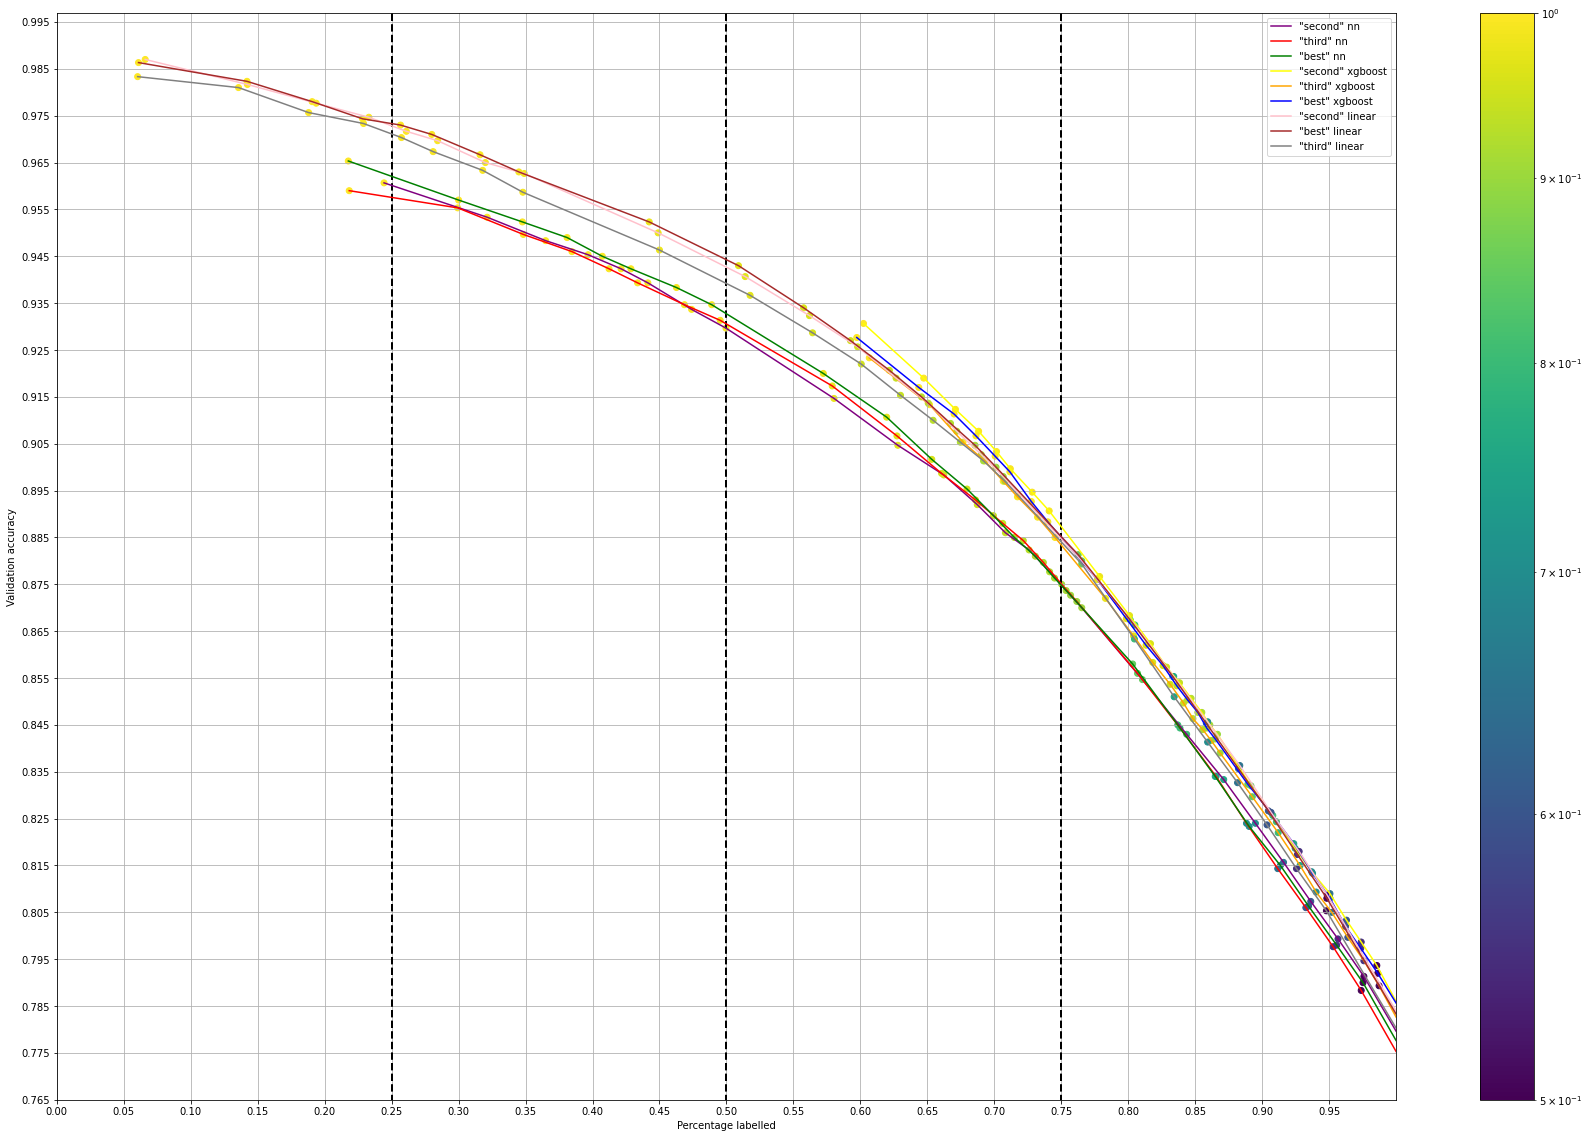

In [37]:
df1 = pd.read_csv("./oesch16_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model=="nn"] # am anfang second besser, ab 0.75 best besster
#df = df[df.combi_model=="xgboost"] # second bestes
#df = df[df.combi_model=="linear"] # am anfang second besser, später best besser

#df = df[df['Name'] == '"best"']
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']


names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (30,20))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=perc, y=acc, c=confidences, norm=matplotlib.colors.LogNorm(vmin=0.5, vmax=1.0))
    plt.plot(perc, acc, c=linecolor, label = f"{name} {combi_mod}")
plt.colorbar()

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((np.round(np.min(accuracies)-0.01, decimals = 3) , np.max(accuracies)+0.01))
plt.grid()
plt.yticks(np.arange(np.round(np.min(accuracies)-0.01, decimals = 3), np.max(accuracies)+0.01, step=0.01))
plt.xticks(np.arange(0, 1, step=0.05))
plt.xlabel("Percentage labelled")
plt.ylabel("Validation accuracy")
plt.legend()
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
plt.show()

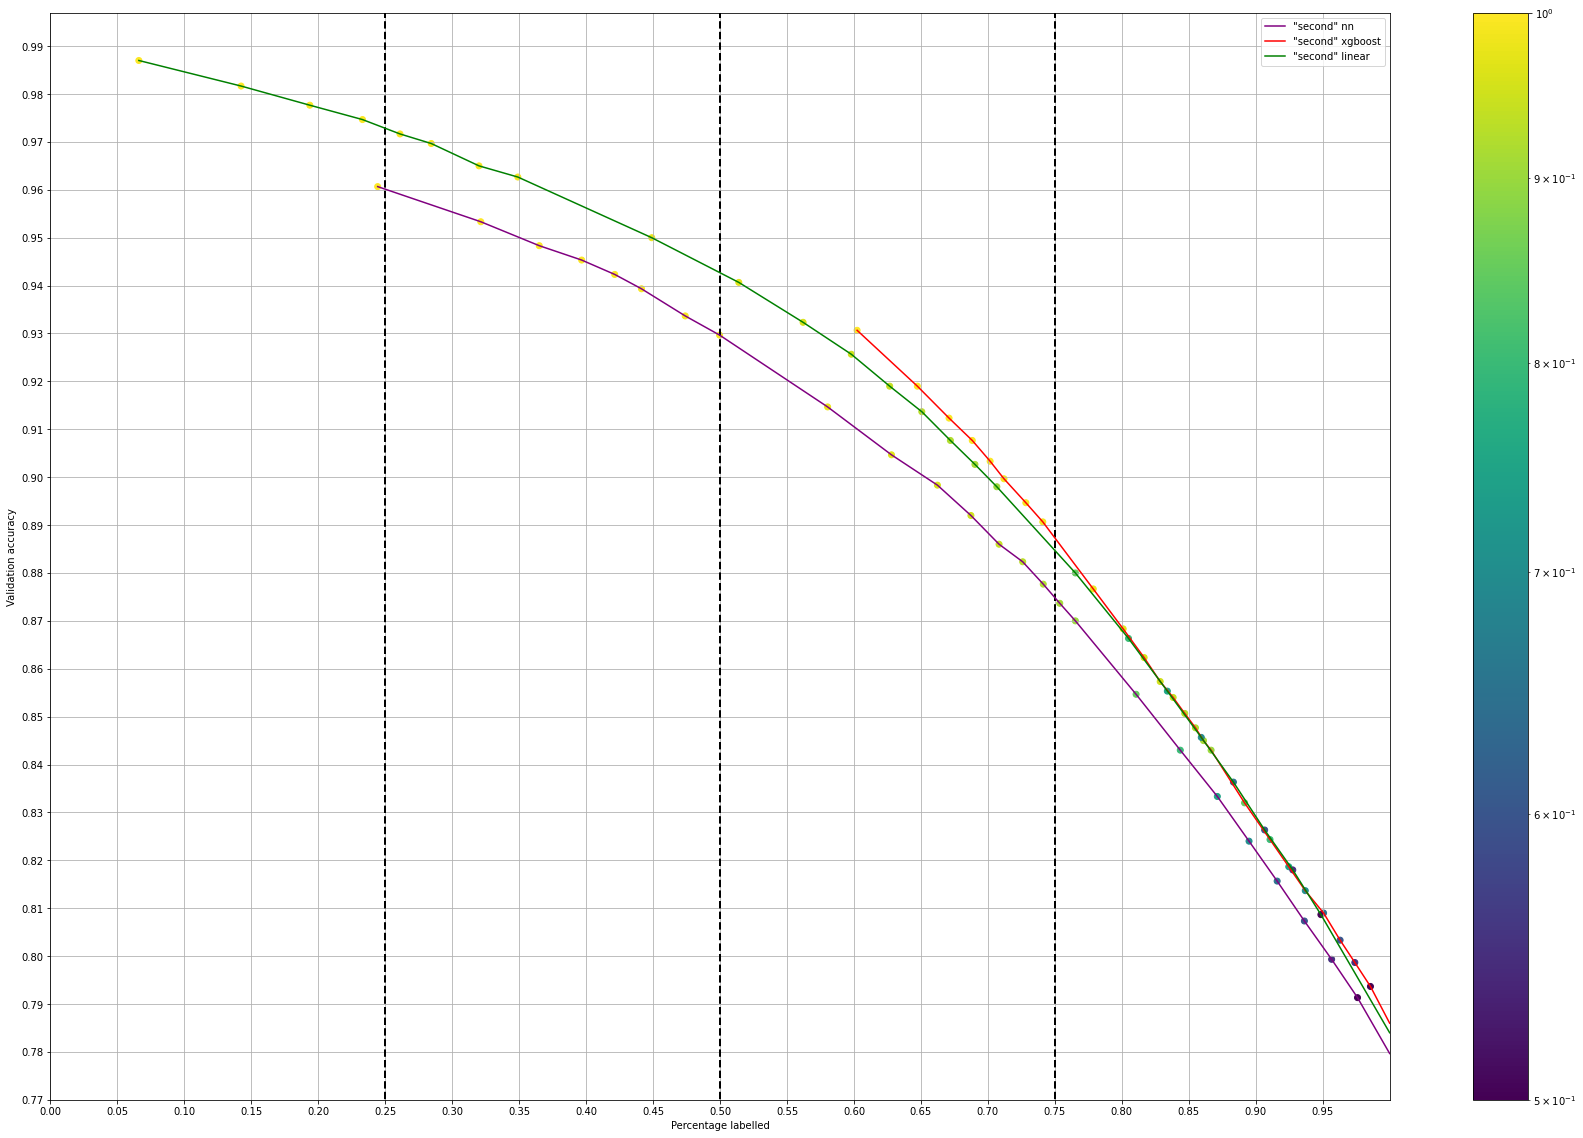

In [36]:
df1 = pd.read_csv("./oesch16_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model=="nn"]
#df = df[df.combi_model=="xgboost"]
#df = df[df.combi_model=="linear"]

#df = df[df['Name'] == '"best"']
df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']


names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (30,20))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=perc, y=acc, c=confidences, norm=matplotlib.colors.LogNorm(vmin=0.5, vmax=1.0))
    plt.plot(perc, acc, c=linecolor, label = f"{name} {combi_mod}")
plt.colorbar()

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((np.round(np.min(accuracies)-0.01, decimals = 3), np.max(accuracies)+0.01))
plt.grid()
plt.yticks(np.arange(np.round(np.min(accuracies)-0.01, decimals = 3), np.max(accuracies)+0.01, step=0.01))
plt.xticks(np.arange(0, 1, step=0.05))
plt.xlabel("Percentage labelled")
plt.ylabel("Validation accuracy")
plt.legend()
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
plt.show()